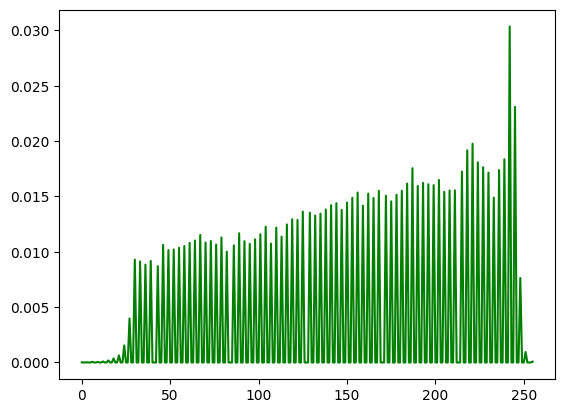

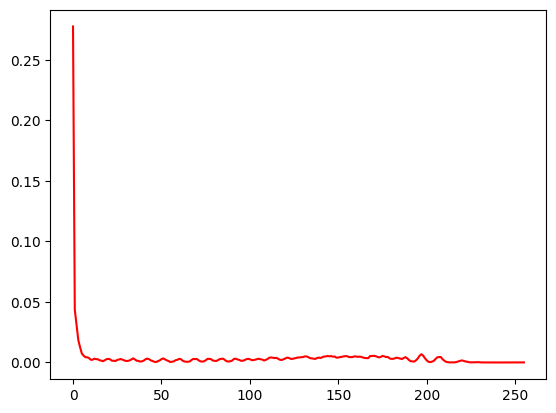

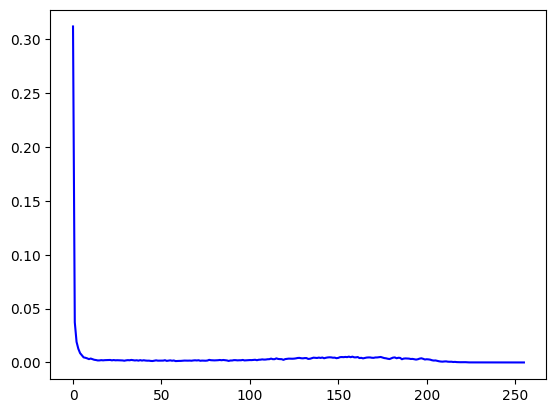

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# reading images, resizing
# target
o_img = cv2.imread('./flower.jpg', cv2.IMREAD_GRAYSCALE)
r_img = cv2.resize(o_img, (256, 256))
im = np.array(r_img)
im_uint8 = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')
p_img = im_uint8

# source
o2_img = cv2.imread('./fog2.jpg', cv2.IMREAD_GRAYSCALE)
r2_img = cv2.resize(o2_img, (256, 256))
im2 = np.array(r2_img)
im2_uint8 = ((im2 - np.min(im2)) * (1/(np.max(im2) - np.min(im2)) * 255)).astype('uint8')
p2_img = im2_uint8
cv2.imwrite('source_original.png', p2_img)


# histogram function
def create_hist(img_in):
    # Initialize a list with 256 zeros to represent the pdf bins
    pdf = [0] * 256
    total_pixels = 0

    # Iterate through each pixel in the image
    for row in img_in:
        for pixel in row:
            # Update the corresponding bin in the pdf
            pdf[pixel] += 1
            total_pixels += 1
    
    pdf = [count / total_pixels for count in pdf]

    return pdf

source_og_hist = create_hist(p2_img)
plt.plot(source_og_hist, color="green")
plt.show()

# pdf function
def create_pdf(img_in):
    # Initialize a list with 256 zeros to represent the pdf bins
    pdf = [0] * 256
    total_pixels = 0

    # Iterate through each pixel in the image
    for row in img_in:
        for pixel in row:
            # Update the corresponding bin in the pdf
            pdf[pixel] += 1
            total_pixels += 1

    pdf = [count / total_pixels for count in pdf]

    return pdf

# cdf function
def create_cdf(pdf):
    
    # Initialize a list to store the cumulative distribution function
    cdf = [0] * len(pdf)
    cdf[0] = pdf[0]

    # Calculate the cumulative distribution function
    for i in range(1, len(pdf)):
        cdf[i] = cdf[i - 1] + pdf[i]

    # Normalizing
    cdf = [j * 255 / cdf[-1] for j in cdf]

    return cdf

def find_closest(cdf_target, value):
    # Find the closest value in cdf_target to the value
    closest_val = min(cdf_target, key=lambda x: abs(x - value))
    return cdf_target.index(closest_val)

# histogram_equalization function
def histogram_matching(source_img_in, targ_img_in):
    # Calculate PDF for both images
    pdf_source = create_pdf(source_img_in)
    pdf_target = create_pdf(targ_img_in)

    # Calculate CDF for both images
    cdf_source = create_cdf(pdf_source)
    cdf_target = create_cdf(pdf_target)

    # Create a mapping from source to target based on CDF values
    mapping = [find_closest(cdf_target, val) for val in cdf_source]

    # Create a new image array from the source image using the mapping
    matched_img = [[mapping[pixel] for pixel in row] for row in source_img_in]

    return matched_img

# writing images, and plotting histograms
matched_image = histogram_matching(p2_img, p_img)
matched_arr = np.array(matched_image)
cv2.imwrite('source_processed.jpg', matched_arr)
cv2.imwrite('target_processed.jpg', p_img)

source_img = cv2.imread('./source_processed.jpg', cv2.IMREAD_GRAYSCALE)
target_img = cv2.imread('./target_processed.jpg', cv2.IMREAD_GRAYSCALE)

source_hist = create_hist(source_img)
target_hist = create_hist(target_img)

plt.plot(source_hist, color="red")
plt.show()

plt.plot(target_hist, color="blue")
plt.show()



